In [145]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [146]:
#arquivos csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv('sampleSubmission.csv')

In [147]:
#primeiras 5 linhas do dado
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.head()

In [148]:
#somente dados de quantidade das pessoas que alugaram bike
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
#dados com weather 1
train.loc[train.weather == 1]

In [ ]:
#dados com weather 2
train.loc[train.weather == 2]

In [ ]:
#dados com weather 3
train.loc[train.weather == 3]

In [ ]:
#dados com weather 4
train.loc[train.weather == 4]

In [151]:
#pegando somente os horarios de datetime
train['time'] = train['datetime'].str[11:13]
train['time']

test['time'] = test['datetime'].str[11:13]
test['time']

0       00
1       01
2       02
3       03
4       04
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: time, Length: 6493, dtype: object

In [152]:
#transformando dtype: object para dtype: int
train['time'] = train['time'].astype(int)
train["time"]

test['time'] = test['time'].astype(int)
test["time"]

0        0
1        1
2        2
3        3
4        4
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: time, Length: 6493, dtype: int32

C:\Users\RinaS\AppData\Local\Temp\ipykernel_1604\1825598753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = train.corr()


<AxesSubplot: >

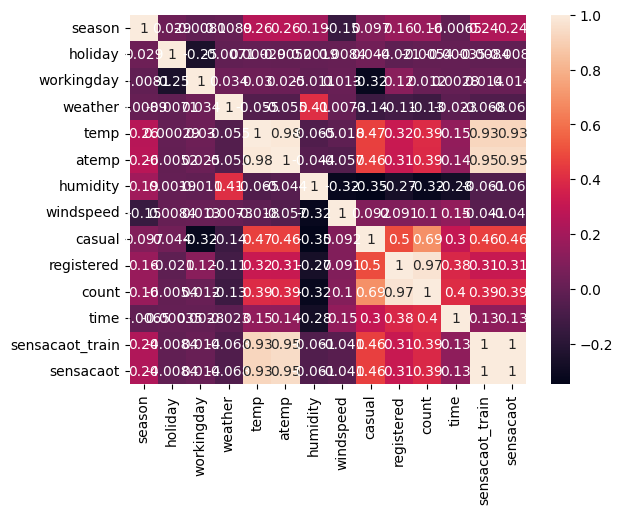

In [169]:
#ver as relações entre os dados
correlacao = train.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)

<AxesSubplot: xlabel='time', ylabel='count'>

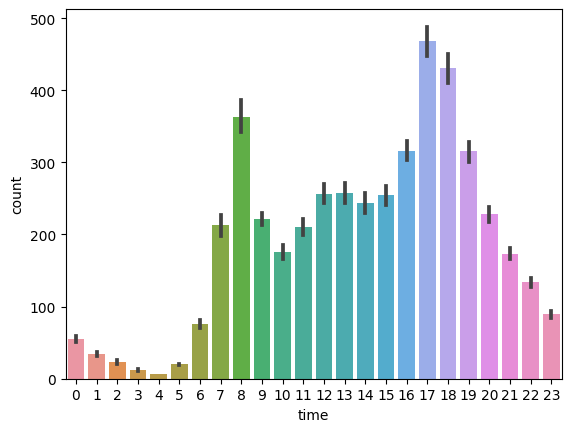

In [153]:
#relação entre horário e aluguel de bike
sns.barplot(x="time", y="count", data=train)

In [159]:
train.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [168]:
#lista criada a partir de 'atemp' para medir o indicador: 0 = Muito Frio, 1 = Frio, 2 = Ameno, 3 = Quente
sensacaot_train = []

for atemp in train["atemp"]:
  if atemp < 10:
    sensacaot_train.append(0)
  elif atemp < 20:
    sensacaot_train.append(1)
  elif atemp < 30:
    sensacaot_train.append(2)
  else:
    sensacaot_train.append(3)

train["sensacaot"] = sensacaot_train

#mesma coisa porém com dados de test
sensacaot_test = []

for atemp in test["atemp"]:
  if atemp < 10:
    sensacaot_test.append(0)
  elif atemp < 20:
    sensacaot_test.append(1)
  elif atemp < 30:
    sensacaot_test.append(2)
  else:
    sensacaot_test.append(3)

test["sensacaot"] = sensacaot_test


<AxesSubplot: xlabel='sensacaot', ylabel='count'>

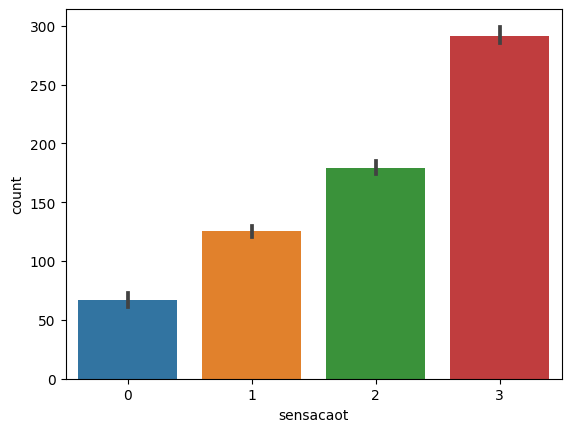

In [170]:
#relação de sensação termica e bikes alugadas
sns.barplot(x="sensacaot", y="count", data=train)

In [ ]:
#coluna de previsão é y
y_train = train.count

In [ ]:
#recursos
train_features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'time']

In [ ]:
#coluna de recursos é x
x_train = train[train_features]

In [ ]:
x_train.describe()

In [ ]:
x_train.head()

In [ ]:
x_train.isnull().sum()

In [ ]:
from sklearn.tree import DecisionTreeRegressor